#**<font color='white'><b>Lab-02 Linear Regression With One Variable**

> Indented block





In the first part of the exercise, we're tasked with implementing linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

**Let's start by importing some libraries and examining the data.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()


Saving ex1data1.csv to ex1data1 (2).csv


{'ex1data1 (2).csv': b'6.1101,17.592\n5.5277,9.1302\n8.5186,13.662\n7.0032,11.854\n5.8598,6.8233\n8.3829,11.886\n7.4764,4.3483\n8.5781,12\n6.4862,6.5987\n5.0546,3.8166\n5.7107,3.2522\n14.164,15.505\n5.734,3.1551\n8.4084,7.2258\n5.6407,0.71618\n5.3794,3.5129\n6.3654,5.3048\n5.1301,0.56077\n6.4296,3.6518\n7.0708,5.3893\n6.1891,3.1386\n20.27,21.767\n5.4901,4.263\n6.3261,5.1875\n5.5649,3.0825\n18.945,22.638\n12.828,13.501\n10.957,7.0467\n13.176,14.692\n22.203,24.147\n5.2524,-1.22\n6.5894,5.9966\n9.2482,12.134\n5.8918,1.8495\n8.2111,6.5426\n7.9334,4.5623\n8.0959,4.1164\n5.6063,3.3928\n12.836,10.117\n6.3534,5.4974\n5.4069,0.55657\n6.8825,3.9115\n11.708,5.3854\n5.7737,2.4406\n7.8247,6.7318\n7.0931,1.0463\n5.0702,5.1337\n5.8014,1.844\n11.7,8.0043\n5.5416,1.0179\n7.5402,6.7504\n5.3077,1.8396\n7.4239,4.2885\n7.6031,4.9981\n6.3328,1.4233\n6.3589,-1.4211\n6.2742,2.4756\n5.6397,4.6042\n9.3102,3.9624\n9.4536,5.4141\n8.8254,5.1694\n5.1793,-0.74279\n21.279,17.929\n14.908,12.054\n18.959,17.054\n7.2182,

In [ ]:
import pandas as pd
data=pd.read_csv('ex1data1.csv' ,names=['Population', 'Profit'])
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [ ]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<Axes: xlabel='Population', ylabel='Profit'>

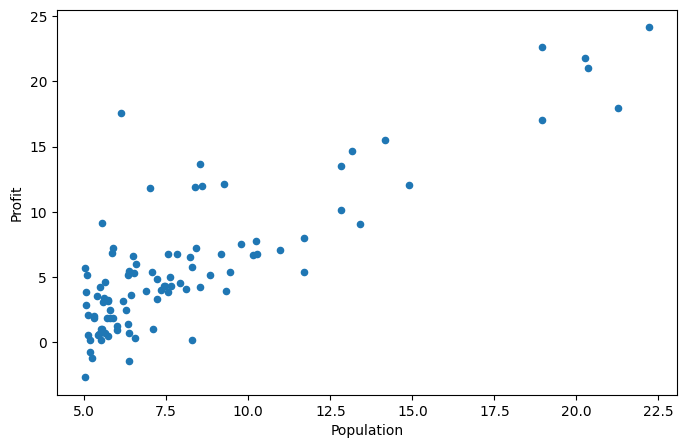

In [ ]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(8,5))

In [ ]:
data.insert(0, 'Ones', 1)


In [ ]:
data.shape

(97, 3)

In [ ]:
data

,Ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [ ]:
cols = data.shape[1]
x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
print(x)
print(y)

    Ones  Population
0      1      6.1101
1      1      5.5277
2      1      8.5186
3      1      7.0032
4      1      5.8598
..   ...         ...
92     1      5.8707
93     1      5.3054
94     1      8.2934
95     1     13.3940
96     1      5.4369

[97 rows x 2 columns]
      Profit
0   17.59200
1    9.13020
2   13.66200
3   11.85400
4    6.82330
..       ...
92   7.20290
93   1.98690
94   0.14454
95   9.05510
96   0.61705

[97 rows x 1 columns]


In [ ]:
x.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [ ]:
x=np.matrix(x)
y=np.matrix(y)
theta=np.matrix(np.array([0,0]))
print("X1",x)
print("Y1",y)
print(theta)

X1 [[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.    

In [ ]:
x.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [ ]:
trans=theta.T
trans

matrix([[0],
        [0]])

In [ ]:
htheta=x*trans
htheta.shape


(97, 1)

In [ ]:
def computeCost(x, y, theta):
  z=np.power(((x * theta.T) - y), 2)
  cost=np.sum(z)/(2 * len(x))
  return cost

In [ ]:
computeCost(x, y, theta)

32.072733877455676

In [ ]:
def gradientDescent(x, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (x * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(x)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(x, y, theta)

    return theta, cost


In [ ]:
alpha=0.01
iters =1000


In [ ]:
Theta, cost = gradientDescent(x, y, theta, alpha, iters)
Theta

matrix([[-3.24140214,  1.1272942 ]])

In [ ]:
computeCost(x, y, Theta)

4.515955503078914